# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

For Capstone Project I choose daily IDR exchange rate against USD. The output will be dashboard that visualize the daily exchange rate movement with line chart and getting insight from the data.

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [70]:
import requests
import pandas as pd
url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [71]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [72]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [73]:
table = soup.find("div", attrs={"class":"col-md-8 page-content"})

Finding row length.

In [74]:
kurs_all = table.find_all("tr")
row_length = len(kurs_all)
row_length

130

In this scraping process, I found that the dates of exchange rate data is wrapped `<tr>` in each row and `<td>` in each column, so I use `<td>` as the key to select the date data and luckily the date is in the first column it is enough to only use `td`. For exchange rate data it is wrapped in `<td>` as well, but the distinction with other data it is a hyperlink(`<a>`) so I use the `<a>` key to extract the exchange and remove to comma to make it easier to change datatype to float.

In [75]:
tgl=[kurs.find("td").text for kurs in kurs_all]
exch=[kurs.a.text.replace(",","") for kurs in kurs_all]

## Creating data frame & Data wrangling

Put the array into dataframe

In [76]:
kurs_data = pd.DataFrame(
    {
        "Date" : tgl,
        "ExRate" : exch
    }
)
kurs_data.head()

,Date,ExRate
0,1/7/2022,14303.69386
1,1/6/2022,14387.13904
2,1/5/2022,14376.59427
3,1/4/2022,14306.22137
4,1/3/2022,14271.10676


In this phase I changed the data type of both columns to proper one. I change the date data to datetime64 and exchange rate data to float64. Also I set Date as Index to make proper visualization.

In [77]:
kurs_data['Date']=kurs_data['Date'].astype('datetime64')
kurs_data['ExRate']=kurs_data['ExRate'].astype('float64')
kurs_data=kurs_data.set_index('Date')

Starting with analyzing the data using `describe()`, get the mean, max min. And visualize it using `.plot()`

In [78]:
kurs_data.describe()

,ExRate
count,130.000000
mean,14306.861583
std,101.802667
min,14056.437620
25%,14243.878163
50%,14295.763245
75%,14379.318585
max,14514.109640


In [79]:
kurs_data[kurs_data['ExRate']==14514.109640]

,ExRate
Date,
2021-07-20,14514.10964


In [80]:
kurs_data[kurs_data['ExRate']==14056.437620]

,ExRate
Date,
2021-10-18,14056.43762


<AxesSubplot:xlabel='Date'>

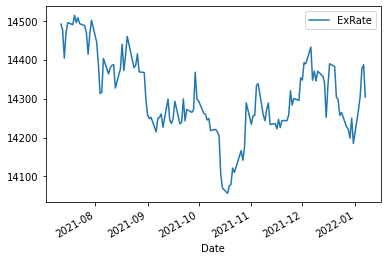

In [81]:
kurs_data.plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:xlabel='Date'>

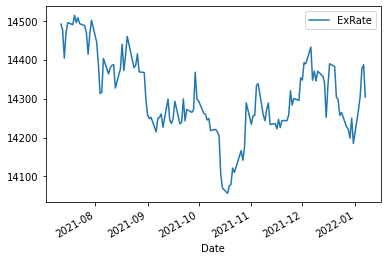

In [82]:
kurs_data.plot()

Average exchange rate from July 2021 until Today is around Rp14,300/US$. The weakest IDR position against USD is happened around July 2021. Yet, the strongest IDR position against USD is  happened around Mid October 2021.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.